In [63]:
#importing libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.shape

(42000, 785)

In [66]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [67]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [68]:
len(df.columns)

785

In [69]:
df['pixel100'].value_counts()

pixel100
0      38438
253      291
254      243
255      226
252       93
       ...  
169        3
151        3
124        3
55         2
83         2
Name: count, Length: 256, dtype: int64

In [70]:
#separating our labels from the features

y = df['label']
x = df.drop(['label'], axis=1)

In [71]:
#Normalizing the pixels in the features
y = np.array(y)
x = np.array(x, dtype='int32')/255

In [72]:
x[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
model = Sequential()

In [75]:
# model.add(Input(input_shape=[784]))
model.add(Dense(128, input_shape=[784], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.2, validation_batch_size=100)

Epoch 1/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7531 - loss: 0.8417 - val_accuracy: 0.9324 - val_loss: 0.2213
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9439 - loss: 0.1955 - val_accuracy: 0.9503 - val_loss: 0.1617
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9605 - loss: 0.1388 - val_accuracy: 0.9493 - val_loss: 0.1542
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1071 - val_accuracy: 0.9622 - val_loss: 0.1311
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.0846 - val_accuracy: 0.9637 - val_loss: 0.1176
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0642 - val_accuracy: 0.9680 - val_loss: 0.1111
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9618 - val_loss: 0.1275
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9893 - loss: 0.0384 - val_accuracy: 0.

In [78]:
model.evaluate(X_train, y_train)

  87/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9895 - loss: 0.0276

2024-08-10 00:09:56.459966: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 105369600 exceeds 10% of free system memory.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9917 - loss: 0.0268


[0.042790260165929794, 0.9874702095985413]

In [79]:
model.evaluate(X_test, y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1172


[0.11506760865449905, 0.9688095450401306]

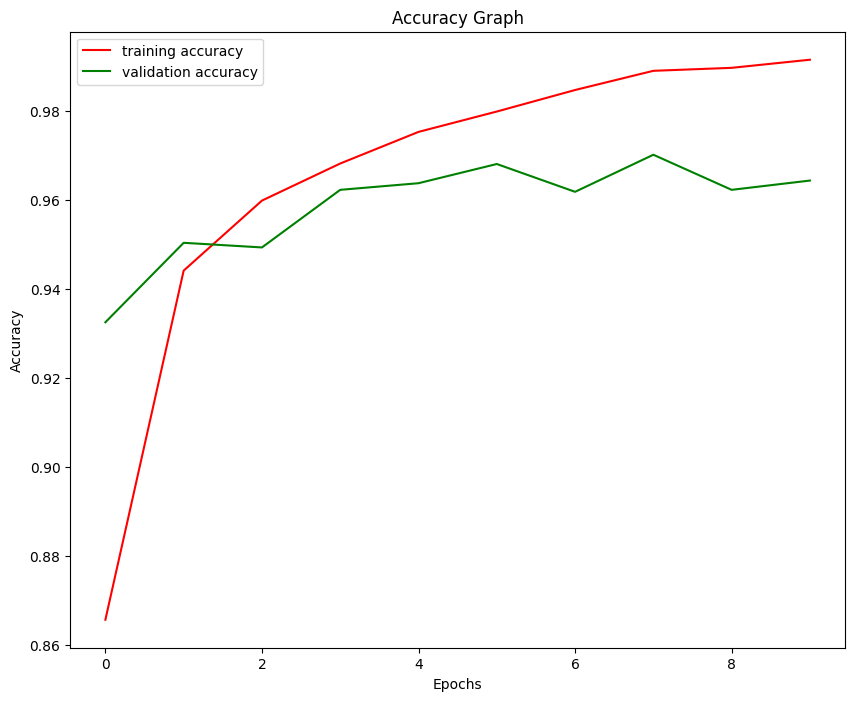

In [80]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history['accuracy'], label='training accuracy', color='red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy', color='green')
plt.title('Accuracy Graph')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

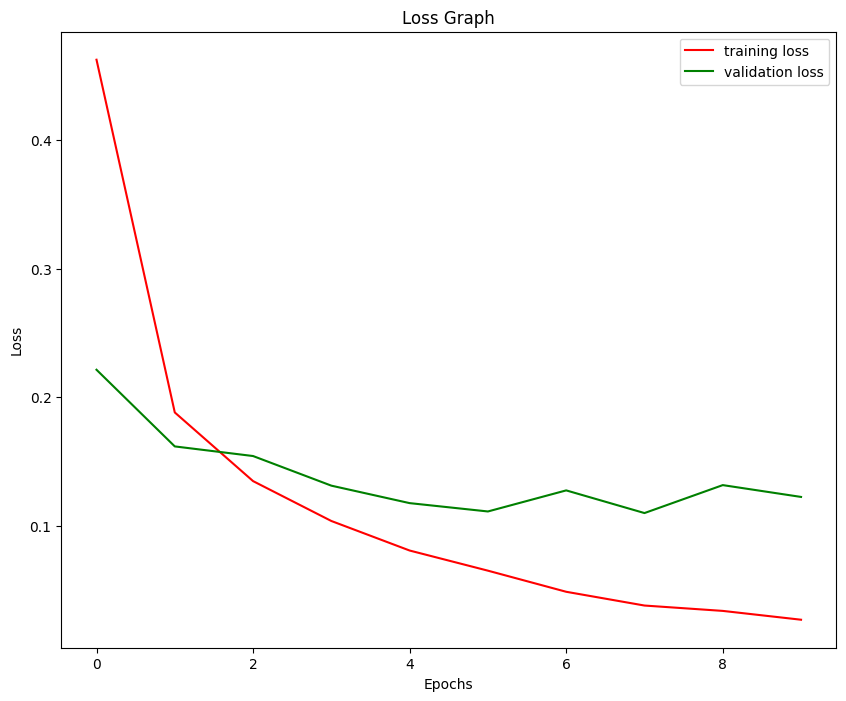

In [81]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history['loss'], label='training loss', color='red')
plt.plot(hist.history['val_loss'], label='validation loss', color='green')
plt.title('Loss Graph')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
test_data = pd.read_csv('test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
test_data.shape

(28000, 784)

In [84]:
df2 = np.array(test_data, dtype='int32')/255

In [85]:
predictions = model.predict(df2)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [86]:
preds = []

for prediction in predictions:
    preds.append(np.argmax(prediction))

In [87]:
preds

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 5,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 9,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 5,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 0,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 7,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 8,
